In [425]:
import pandas as pd
import numpy as np

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
bmi_list = pd.read_csv('bmi.csv', encoding='utf-8')

In [428]:
max_h = np.max(bmi_list['height'])

In [429]:
pd.value_counts(bmi_list['label'])

fat       7712
thin      6338
normal    5950
Name: label, dtype: int64

In [430]:
bmi_list.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [431]:
for i, row in bmi_list.iterrows() :
    if bmi_list.at[i,'label'] == 'thin':
        bmi_list.at[i,'label'] = 0

In [432]:
for i, row in bmi_list.iterrows() :
    if bmi_list.at[i,'label'] == 'normal':
        bmi_list.at[i,'label'] = 1

In [433]:
for i, row in bmi_list.iterrows() :
    if bmi_list.at[i,'label'] == 'fat':
        bmi_list.at[i,'label'] = 2

In [434]:
bmi_list.head()

,height,weight,label
0,140,45,1
1,145,72,2
2,150,61,2
3,137,56,2
4,192,48,0


In [435]:
bmi_list['height'] = bmi_list['height']/max_h

In [436]:
max_w = np.max(bmi_list['weight'])

In [437]:
bmi_list['weight'] = bmi_list['weight']/max_w

In [438]:
y = bmi_list.loc[:,'label']

In [439]:
x = bmi_list.loc[:,['height','weight']]

In [440]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, train_size=0.8, shuffle=True)

In [441]:
x_train.shape

(16000, 2)

In [442]:
x_test.shape

(4000, 2)

In [443]:
x_train = x_train.astype('float32')

In [444]:
x_test = x_test.astype('float32')

In [445]:
x_train.head()

,height,weight
11907,0.805,0.5750
11656,0.835,1.0000
18605,0.685,0.7625
15610,0.670,0.7000
4714,0.645,0.6875


In [446]:
from keras.utils import np_utils

In [447]:
y_train.head()

11907    0
11656    2
18605    2
15610    2
4714     2
Name: label, dtype: object

In [448]:
y_train = np_utils.to_categorical(y_train)

In [449]:
y_test = np_utils.to_categorical(y_test)

In [450]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [459]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

In [468]:
model = Sequential()

In [469]:
model.add(Dense(400,input_dim=2, activation='sigmoid'))

In [470]:
model.add(Dense(200, activation="sigmoid"))

In [471]:
model.add(Dense(3, activation="sigmoid"))

In [472]:
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

In [473]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 400)               1200      
_________________________________________________________________
dense_103 (Dense)            (None, 200)               80200     
_________________________________________________________________
dense_104 (Dense)            (None, 3)                 603       
Total params: 82,003
Trainable params: 82,003
Non-trainable params: 0
_________________________________________________________________


In [475]:
%%time
hist = model.fit(x_train, y_train,
                epochs=50, batch_size=100,
                validation_data=(x_test, y_test), 
                verbose=2
                )

Train on 16000 samples, validate on 4000 samples
Epoch 1/50
 - 1s - loss: 0.2165 - accuracy: 0.4212 - val_loss: 0.2179 - val_accuracy: 0.3762
Epoch 2/50
 - 1s - loss: 0.2159 - accuracy: 0.4344 - val_loss: 0.2148 - val_accuracy: 0.3850
Epoch 3/50
 - 1s - loss: 0.2149 - accuracy: 0.4522 - val_loss: 0.2145 - val_accuracy: 0.3850
Epoch 4/50
 - 1s - loss: 0.2140 - accuracy: 0.4504 - val_loss: 0.2131 - val_accuracy: 0.3902
Epoch 5/50
 - 1s - loss: 0.2129 - accuracy: 0.4691 - val_loss: 0.2119 - val_accuracy: 0.4728
Epoch 6/50
 - 1s - loss: 0.2114 - accuracy: 0.4967 - val_loss: 0.2127 - val_accuracy: 0.4610
Epoch 7/50
 - 1s - loss: 0.2097 - accuracy: 0.5054 - val_loss: 0.2095 - val_accuracy: 0.4467
Epoch 8/50
 - 1s - loss: 0.2077 - accuracy: 0.5359 - val_loss: 0.2069 - val_accuracy: 0.6628
Epoch 9/50
 - 1s - loss: 0.2053 - accuracy: 0.5654 - val_loss: 0.2061 - val_accuracy: 0.3850
Epoch 10/50
 - 1s - loss: 0.2022 - accuracy: 0.5939 - val_loss: 0.2017 - val_accuracy: 0.4345
Epoch 11/50
 - 1s - 

In [476]:
import matplotlib.pyplot as plt
%matplotlib inline

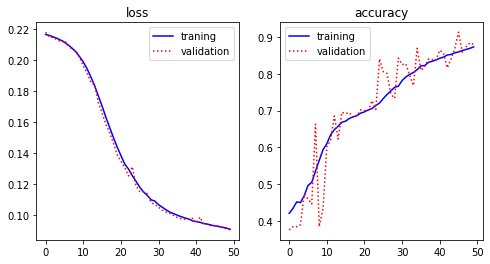

In [477]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label='traning')
plt.plot(hist.history['val_loss'], 'r:', label='validation')
plt.title('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'b-', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='validation')
plt.title('accuracy')
plt.legend()

plt.show()